In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ahu12 = pd.read_csv('AHU_13.csv',low_memory = False)
ahu12 = ahu12.ffill()
ahu12.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,31-12-2015,00:00:00,ON,1.9,66.1,ON,76.3,7.5,0,64.7,69.5
1,31-12-2015,00:06:39,ON,1.9,66.1,ON,76.3,7.5,0,64.7,69.5
2,31-12-2015,00:07:26,ON,1.9,66.5,ON,76.3,7.5,0,64.7,69.5
3,31-12-2015,00:07:31,ON,1.9,66.5,ON,77.1,7.5,0,64.7,69.5
4,31-12-2015,00:07:39,ON,1.9,66.5,ON,77.1,7.5,0,64.7,69.5


In [4]:
ahu12.rename(columns={'Column1':'Date','Column2':'Time','Column3':'supply fan ON?OFF','Column4':'Cooling coil valve %open',
                      'Column5':'Cold Deck temperature','Column6':'exhaust fans ON?OFF','Column7':'Hot Deck temperature',
                      'Column8':'Hot Deck Valve','Column9':'Mixed air damper % open','Column10':'Mixed air temperature',
                      'Column11':'Return air temperature'},inplace = True)
ahu12.head()

,Date,Time,supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Hot Deck Valve,Mixed air damper % open,Mixed air temperature,Return air temperature
0,31-12-2015,00:00:00,ON,1.9,66.1,ON,76.3,7.5,0,64.7,69.5
1,31-12-2015,00:06:39,ON,1.9,66.1,ON,76.3,7.5,0,64.7,69.5
2,31-12-2015,00:07:26,ON,1.9,66.5,ON,76.3,7.5,0,64.7,69.5
3,31-12-2015,00:07:31,ON,1.9,66.5,ON,77.1,7.5,0,64.7,69.5
4,31-12-2015,00:07:39,ON,1.9,66.5,ON,77.1,7.5,0,64.7,69.5


In [5]:
ahu12['Cooling coil valve %open'] = pd.to_numeric(ahu12['Cooling coil valve %open'],errors = 'coerce')
ahu12['Cold Deck temperature'] = pd.to_numeric(ahu12['Cold Deck temperature'],errors = 'coerce')
ahu12['Hot Deck temperature'] = pd.to_numeric(ahu12['Hot Deck temperature'],errors = 'coerce')
ahu12['Hot Deck Valve'] = pd.to_numeric(ahu12['Hot Deck Valve'],errors = 'coerce')
ahu12['Mixed air damper % open'] = pd.to_numeric(ahu12['Mixed air damper % open'],errors = 'coerce')
ahu12['Mixed air temperature'] = pd.to_numeric(ahu12['Mixed air temperature'],errors = 'coerce')
ahu12['Return air temperature'] = pd.to_numeric(ahu12['Return air temperature'],errors = 'coerce')
ahu12 = ahu12.ffill()

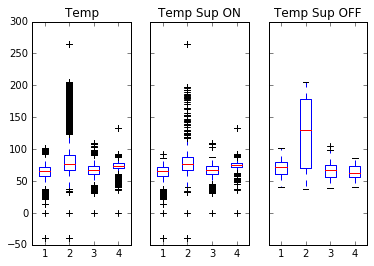

In [6]:
sup_on = ahu12[ahu12['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu12[ahu12['supply fan ON?OFF'].str.contains('OFF')]
data = [ahu12['Cold Deck temperature'],ahu12['Hot Deck temperature'],ahu12['Mixed air temperature'],ahu12['Return air temperature']]
data1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature'],sup_on['Return air temperature']]
data2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature'],sup_off['Return air temperature']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data)
ax1.set_title('Temp')
ax2.boxplot(data1)
ax2.set_title('Temp Sup ON')
ax3.boxplot(data2)
ax3.set_title('Temp Sup OFF')
#plt.show()
plt.savefig(''.join(['Temp','_ahu13']))
# all temperature values have data loss so no box plots

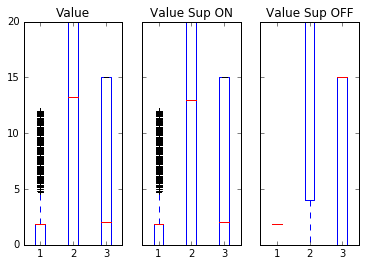

In [7]:
data_value = [ahu12['Cooling coil valve %open'],ahu12['Hot Deck Valve'],ahu12['Mixed air damper % open']]
data_value_1 = [sup_on['Cooling coil valve %open'],sup_on['Hot Deck Valve'],sup_on['Mixed air damper % open']]
data_value_2 = [sup_off['Cooling coil valve %open'],sup_off['Hot Deck Valve'],sup_off['Mixed air damper % open']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value Sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value Sup OFF')
#plt.show()
plt.savefig(''.join(['Value', '_','_ahu13']))

In [19]:
ahu12.columns.values
df1 = ahu12.copy()
df1=ahu12.drop(['Date', 'Time','supply fan ON?OFF', 'exhaust fans ON?OFF'],1)

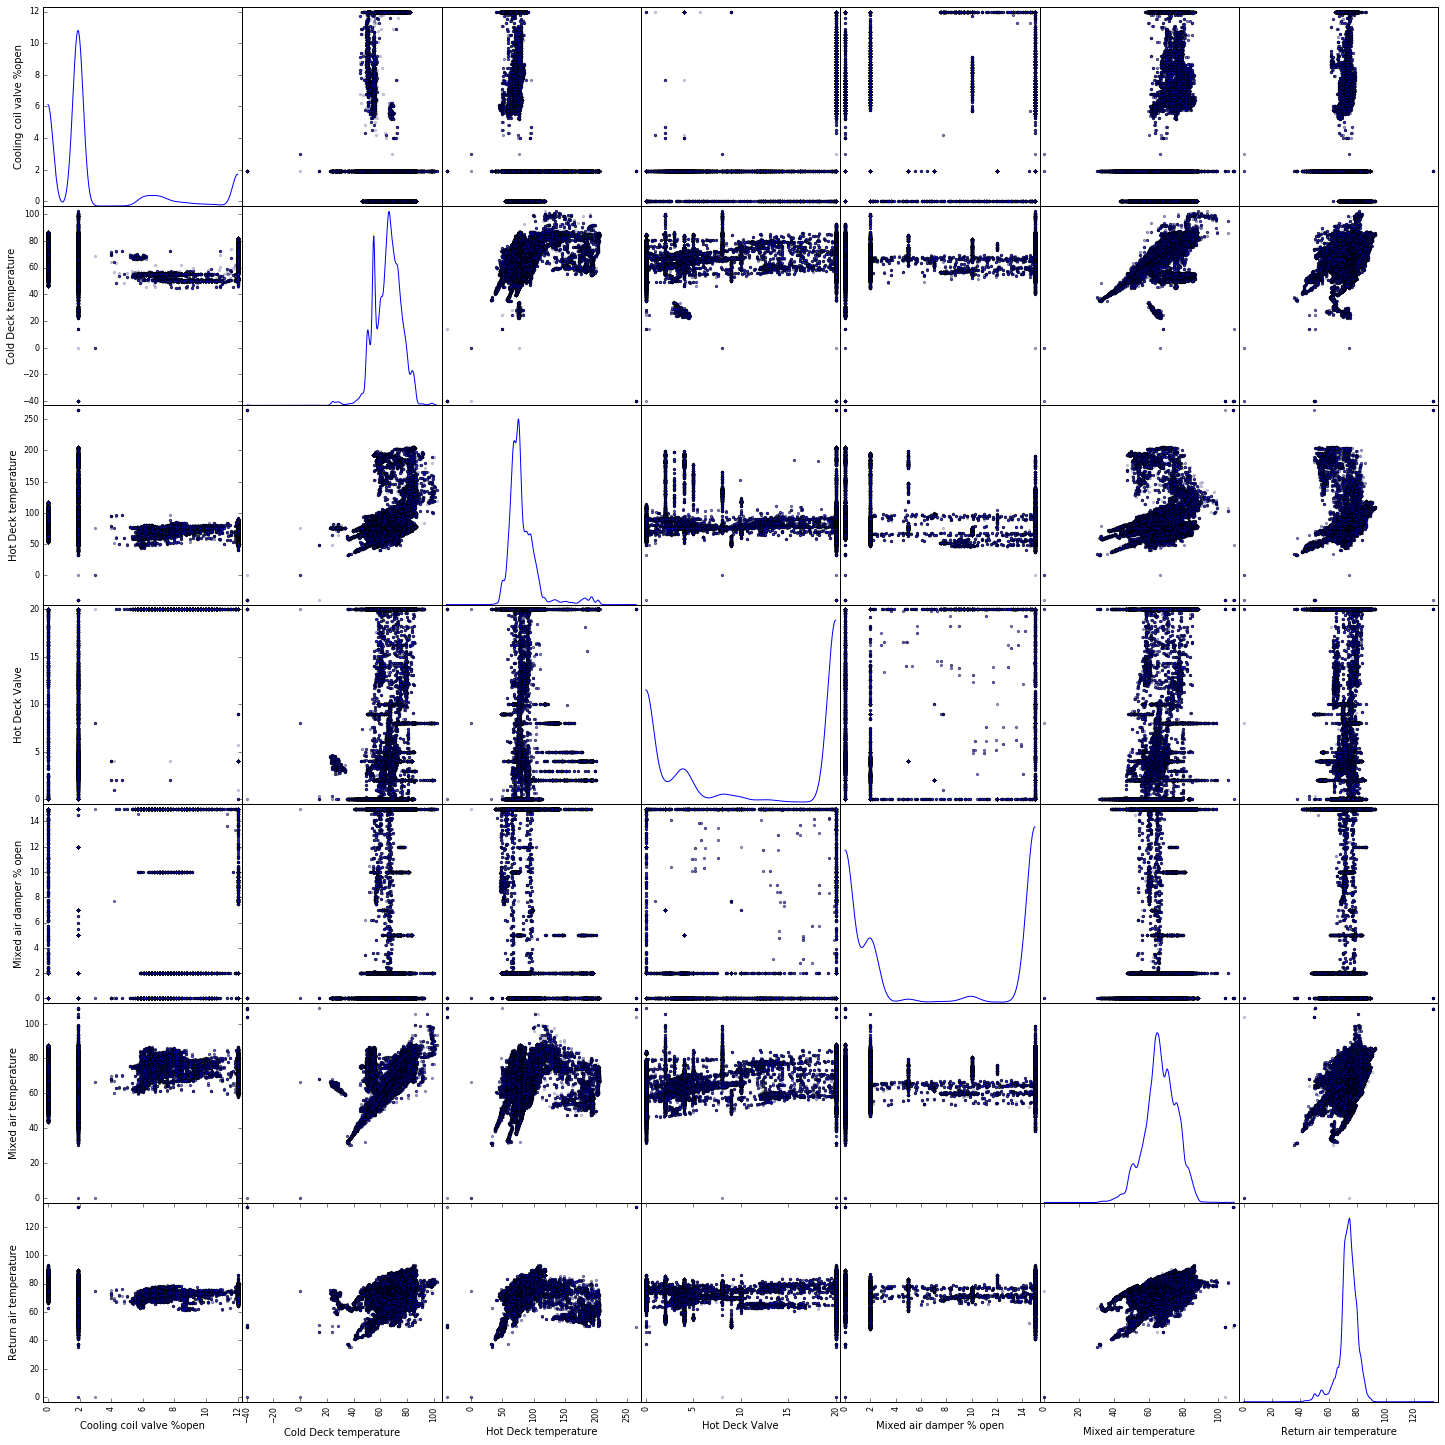

In [21]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25), diagonal = 'kde')
plt.savefig(''.join(['bivariate','_ahu_13']))